# 01. Genetic Algorithm

[어려운 문제란?]

1. 알고리즘의 실행이 어려운 문제?
2. 알고리즘을 이해하기 어려운 문제?
3. 실질적으로 가장 어려운 문제란, 계산 자체에 시간이 오래 걸리는 문제이다 (1, 2번은 문제를 푸는 사람의 역량에 따라 난이도가 낮아짐)

[Search space and global optimum]
- Search Space에서 최적해 찾기
    - BST(Binary Search Tree)에서 최댓값 찾기
- 패턴/구조화 되어 있지 않거나 Space가 매우 크면 최적해 찾기 어려움 → 탐색 필요

[Heuristic based Optimization Technique]
- Structure가 없는 상황에서의 Search 방식
- Hueristic(휴리스틱) : 알고리즘은 Proof가 되어 있는 것(해를 찾을 수 있다는 보장이 있음)인 반면, 풀릴 것이라는 기대를 가지고서 수행하는 것 (보장이 아님)
    - 더 이상 갈 수 없을 때까지 높은 곳으로 이동 
       - → 협소한 지역의 높은 곳은 못 찾고 지나갈 수도 있음 (Local Optimum이 Global Optimum이 아닐 수도 있음)
    - Hill-climbing heuristics
    - gradient-ascent heuristcs


[Genetic Algorithm]
- Gene : Genotype을 구성하는 요소
- Genotype : Gene의 집합 / 어떤 문제의 해법을 하나로 표현하는 방법
    - 한 개인은 특정한 Genotype을 가짐
    - location 위치에 대해서도 Genotype을 가짐
- Phenotype : 관측치 (Entity에 대한 Observation)
    - Fittest pheonotype : 가장 최적의 고도 = Optimal Value

# 02. TSP (Traveling Salesman Problem)

[Traveling Salesman Problem]
- SCM(Supply Chain Manangement)의 흔한 문제
- search가 unstructured된 상황에서 매우 큰 Search가 필요하기 때문에 Heuristic 방식으로 진행됨
- 모든 도시들을 돌면서 가장 값 싼 루트를 찾는 것 (여행 경비를 최소화하며 물건을 팔아야 하기 때문)

[Terminology of genetic Algorithm]
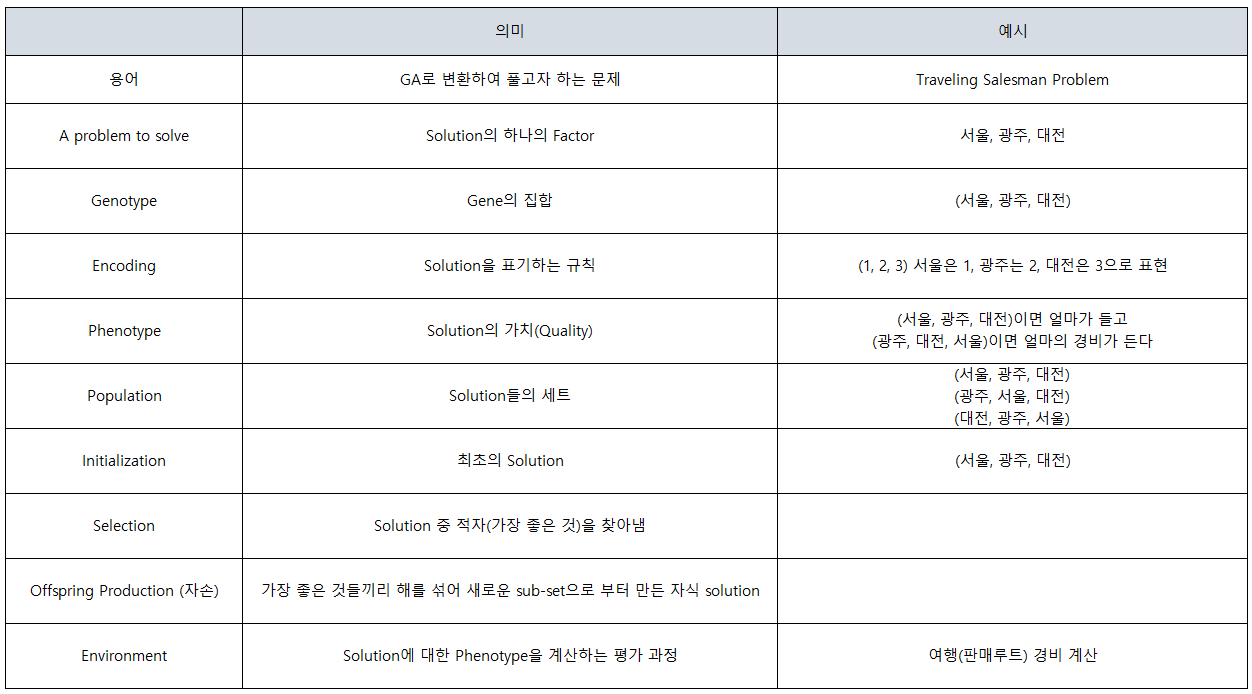

# 03. Terminology and Structure of Genetic Algorithm

[Structure of Genetic Algorithm]

In [2]:
class GeneticAlgorithm:
    def performEvolution(self, numIterations, numOffstrings):
        population = self.createInitialPopulation() #최초의 알고리즘 생성
        for itr in range(numIterations):
            offstring = {}
            for itr2 in range(numOffstrings):
                p1, p2 = self.selectParents() #부모가 되는 2개의 해 선택
                offstring[ir2] = self.crossoverParents(p1, p2) #2개의 해를 적절히 조합
                offstring[itr2] = self.mutation(offstring[tr2]) #변화를 통해 자손해를 만듬
                
            self.substritutePopulation(population, offstring) #기존 population에 대체
        mostFittest = self.findBestSolution(population)
        return mostFittest #Heuristic

# 04. Encoding

[Encoding]
- 우리가 어떻게 Solution을 표현할 것인가
    - 여러개의 유전자로 표현해보자
    - K-ary coding : [0, 1, 2] , [2, 0, 1]
    - binary coding : [00, 10, 01], [10 ,00, 01] (이진법)
    - 문제 특화형 표현 : 012, 210, 021 ← invalid한 encoding을 바로바로 찾을 수 있음 (1번째 위치가 첫번째 position, 2번째 위치가 두번째 position 등으로 위치와 장소를 동시에 표현해 줄 수 있음)

# 05. Selection

[Selection Step]
- Encoding Step 다음의 Step
- inferior(못한/질낮은)한 population도 버리지 않고 데려감 (fitting한 해를 찾기 위해 / to obtain a global optimum)
- 교배가 일어나는 Step 
    - 어떤 것이 교배가 될까 ? Natural Selection

[Roulette Wheel based]
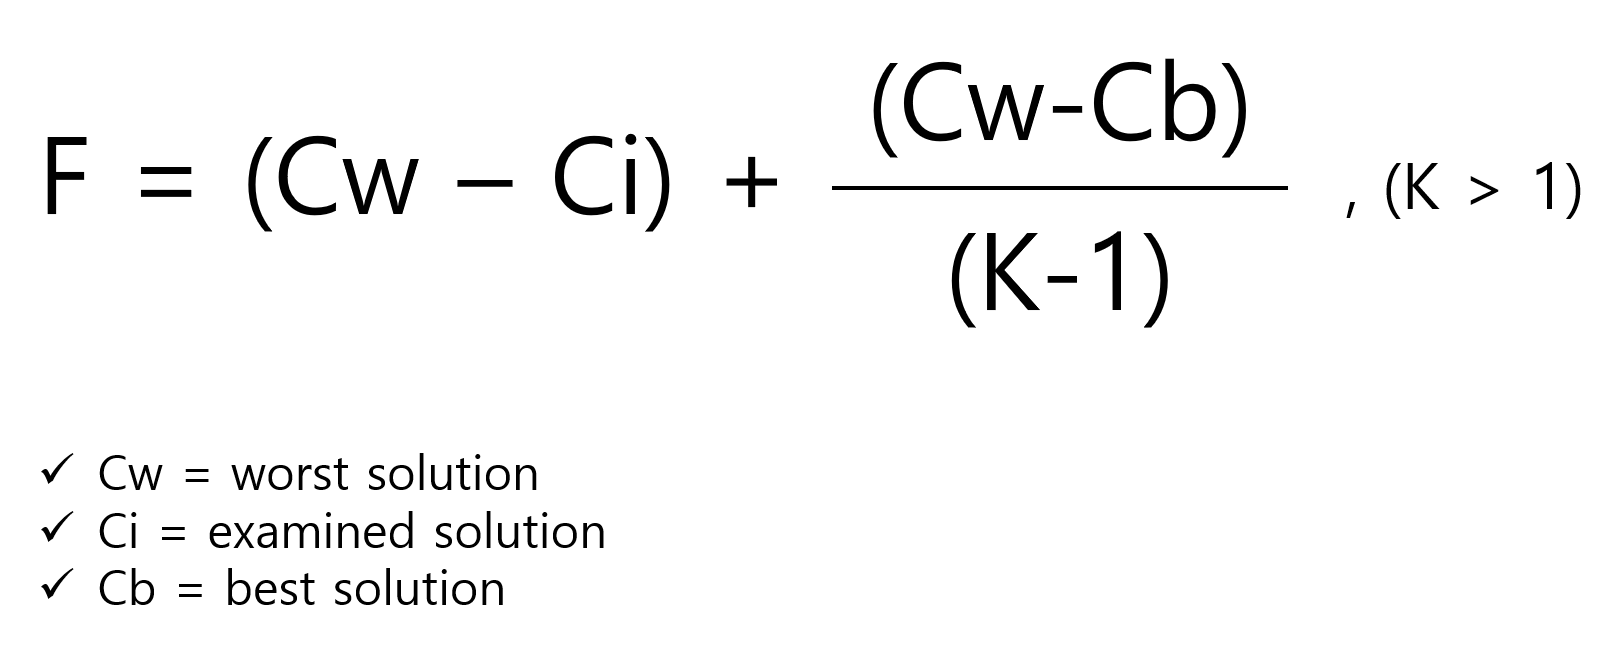
→ K값에 따라 각각의 f들이 갖는 값의 비율이 달라지며, K값의 조정을 통해 Solution 선택을 얼마나 완곡하게 할 것인 지를 결정할 수 있음

# 06. Crossover

[Crossover step]

- 새로운 솔루션은 2개의 솔루션의 gene을 Mix Up 해서 만듬
- 좋은 part만 떼서 crossover시키는 algorithm이 필요 (안좋은 part로 crossover하면 최악의 solution이 생길 수 있음)
    - 우성유전자와 열성유전자의 개념으로 접근

[Multi-point crossover]
- One point crossover : crossoverpoint가 1개임, 즉 genotype을 2개의 part로만 나눠서 조합 / 조합 solution 2개

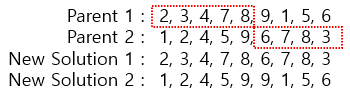

- Multi point crossover : crossoverpoint가 여러개 / 만들어지는 조합 solution은 여전히 2개임

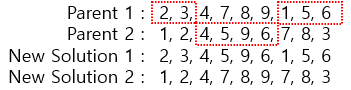


# 07. Mutation

[Mutation Step]
- Crossover 다음 Step
- Genotype에 변형을 주어서, 최고의 조합을 찾아내는 것
- crossover된 solution에 추가 변형을 주는 것 

[Random and Swap]
- Random Mutation (Random Number Generation)
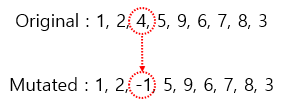
→ Category Value에서 벗어난 Solution이기 때문에 채택할 수 없음

- Swap Mutation (Random Number Generation)
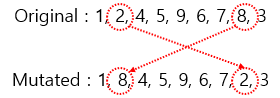

# 08. Substitution

[Substitution Step]

- Feedback system과 같음


- N : 기존에 갖고 있는 solution의 개수
- K : 새로운 solution의 개수
- K / N = generation gap
- K / N → 1 = K와 N이 거의 같아짐
    - 거의 다 replace가 됨
    - Generational GA
    - Dynamic but slow
- K / N  → 1 / N = K가 1에 가까워짐
    - 1개 정도만 새로워짐
    - Steady state GA
    - Steady but fast

[Setting Up and execute]

In [ ]:
class GeneticAlgorithm:
    def performEvolution(self, numIterations, numOffstrings): #numiterations : 진화를 몇 번 할 것인지 결정
        population = self.createInitialPopulation() #어떻게 Population을 정할 것인가 (Large면 diversity하지만 slow / Small이면 반대 / Diversity하게 만들 것인가? 등)
        for itr in range(numIterations):
            offstring = {}
            for itr2 in range(numOffstrings):
                p1, p2 = self.selectParents() 
                offstring[ir2] = self.crossoverParents(p1, p2) 
                offstring[itr2] = self.mutation(offstring[tr2]) 
                
            self.substritutePopulation(population, offstring) 
        mostFittest = self.findBestSolution(population)
        return mostFittest 